In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("/content/drive/MyDrive/Machine Learning/Classification/Credit Card Defaulters/default of credit card clients.xls")

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.shape

(30000, 24)

In [5]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [7]:
import seaborn as sns

In [8]:
# sns.pairplot(data)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

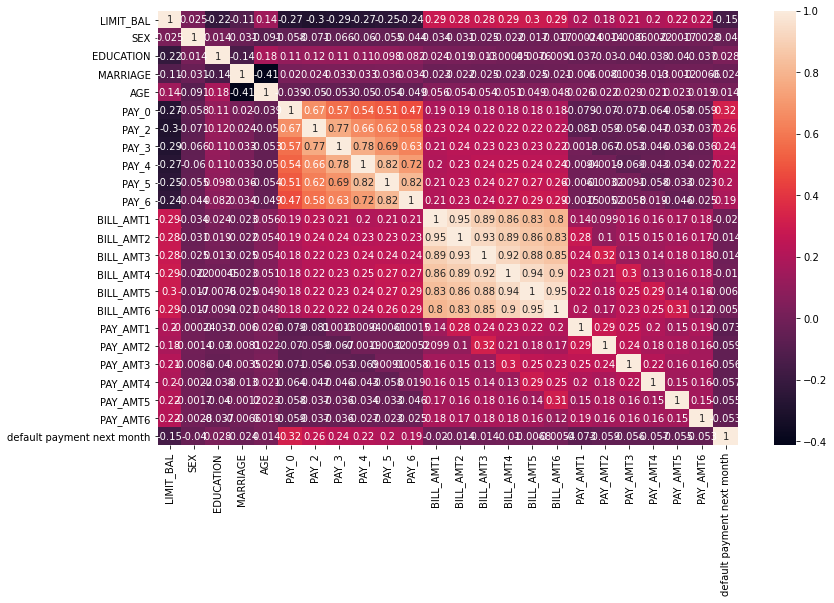

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(), annot=True )

In [22]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [17]:
data.iloc[:,:-1]######### reterieve all rows except last coloumn
data.iloc[:,-1]### reterieve all rows of last column


0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64

In [18]:
x = data.drop(labels=['default payment next month'],axis=1)
y = data['default payment next month']

In [21]:
x

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [ ]:
## since all columns are in numerical dtype..lets do the standard scaling on it

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [25]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((22500, 23), (22500,), (7500, 23), (7500,))

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train,y_train)


In [28]:
y_pred = gnb.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,classification_report
ac = accuracy_score(y_test,y_pred)
ac

0.6918666666666666

In [30]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [32]:
xgb = XGBClassifier(n_estimators=100)
xgb = xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)

In [33]:
ac = accuracy_score(y_test,y_pred)
ac

0.8201333333333334

In [34]:
param_grid_xgboost = {"n_estimators":[50,100,150],"max_depth":range(3,11,1),"random_state":[0,50,100]}

In [38]:
grid = GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid_xgboost,cv=2,verbose=3,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 2 folds for each of 72 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  4.4min finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(3, 11),
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 50, 100]},
             p

In [39]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
# extracting the best parameters
random_state = grid.best_params_['random_state']
max_depth = grid.best_params_['max_depth']
n_estimators = grid.best_params_['n_estimators']
random_state,max_depth,n_estimators

(0, 3, 100)

In [42]:
xgb = XGBClassifier(n_estimators=n_estimators,max_depth=max_depth,random_state=random_state)
xgb = xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
ac = accuracy_score(y_test,y_pred)
ac

0.8201333333333334